<a href="https://colab.research.google.com/github/DK257/Machine-Learning/blob/main/_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DK257/Machine-Learning

fatal: destination path 'Machine-Learning' already exists and is not an empty directory.


In [2]:
import os
os.chdir("Machine-Learning")

In [14]:
dir_black = '/content/Machine-Learning/Black Soil'
dir_Cinder = '/content/Machine-Learning/Cinder Soil'
dir_Laterite = '/content/Machine-Learning/Laterite Soil'
dir_peat = '/content/Machine-Learning/Peat Soil'
dir_yellow = '/content/Machine-Learning/Yellow Soil'


In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
image_size = 220
batch_size = 10

target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/content/Machine-Learning/',
        target_size=(200, 200),
        batch_size=batch_size,
        classes=['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil'],
        class_mode='categorical')


Found 100 images belonging to 5 classes.


In [16]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [17]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [18]:
model = tf.keras.models.Sequential([

    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 64)        0

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [21]:
total_sample = train_generator.n
n_epochs = 30

In [22]:
history = model.fit(
        train_generator,
        steps_per_epoch = int(total_sample/batch_size),
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
10/10 [==============================] - 5s 316ms/step - loss: 1.6187 - acc: 0.2300
Epoch 2/30
10/10 [==============================] - 5s 456ms/step - loss: 1.4849 - acc: 0.3100
Epoch 3/30
10/10 [==============================] - 3s 318ms/step - loss: 1.1566 - acc: 0.4200
Epoch 4/30
10/10 [==============================] - 3s 300ms/step - loss: 1.1389 - acc: 0.4200
Epoch 5/30
10/10 [==============================] - 3s 331ms/step - loss: 1.1541 - acc: 0.4200
Epoch 6/30
10/10 [==============================] - 4s 413ms/step - loss: 1.1204 - acc: 0.3900
Epoch 7/30
10/10 [==============================] - 3s 301ms/step - loss: 0.9253 - acc: 0.4900
Epoch 8/30
10/10 [==============================] - 3s 303ms/step - loss: 1.0144 - acc: 0.3900
Epoch 9/30
10/10 [==============================] - 4s 405ms/step - loss: 0.9679 - acc: 0.5400
Epoch 10/30
10/10 [==============================] - 3s 307ms/step - loss: 0.7865 - acc: 0.7000
Epoch 11/30
10/10 [==============================

In [23]:
import matplotlib.pyplot as plt

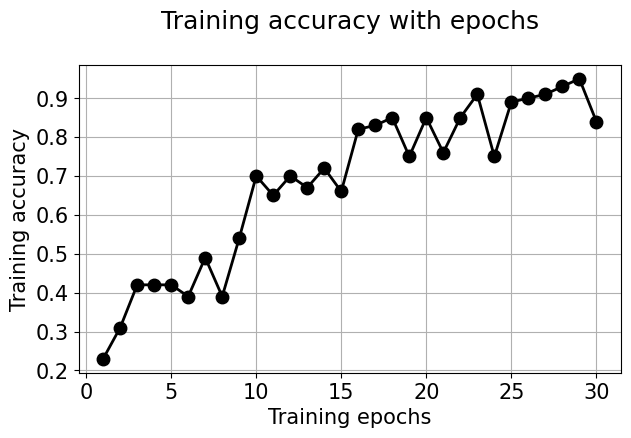

In [24]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [28]:
model.save(filepath="/content/Machine-Learning/save_model/")
model.save('my_model2')

In [29]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/Machine-Learning/save_model/')
tflite_model = converter.convert()
with open("soil.tflite", "wb") as f:
    f.write(tflite_model)

In [30]:
model.save_weights("model_weights.h5.2")

In [ ]:
#  tf.keras.models.save_model(model, filepath="save_model/save_model")